# Solución provisional

# SOLUCION PROVISIONAL

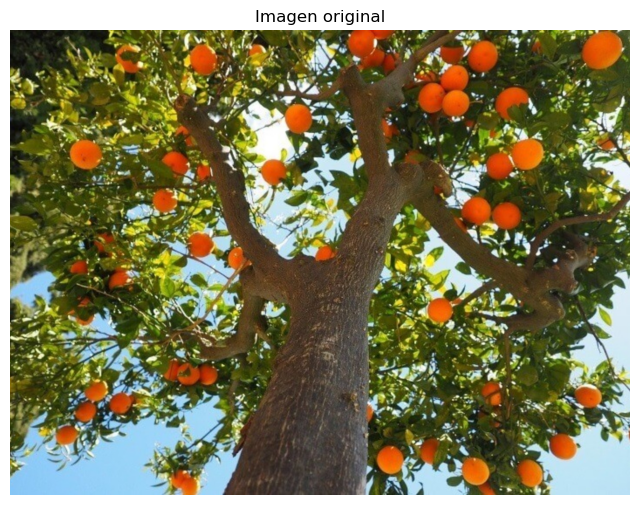

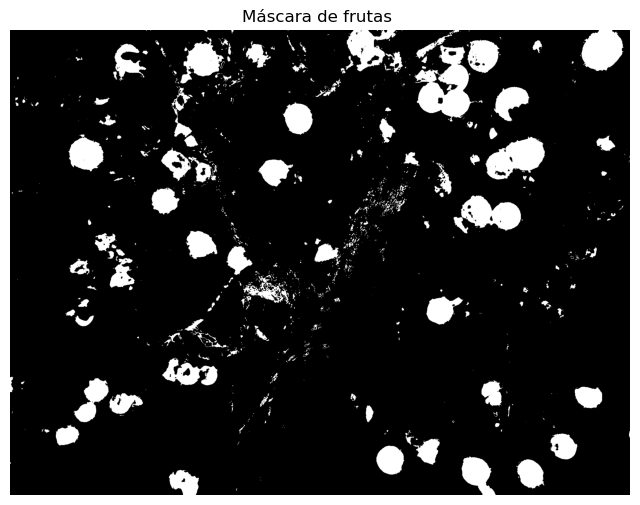

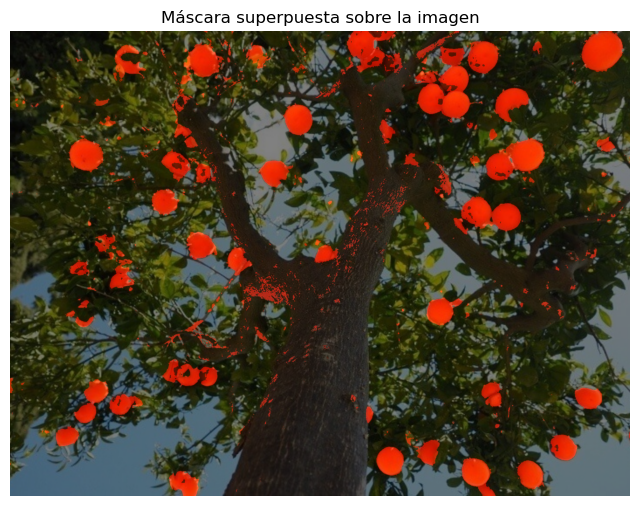

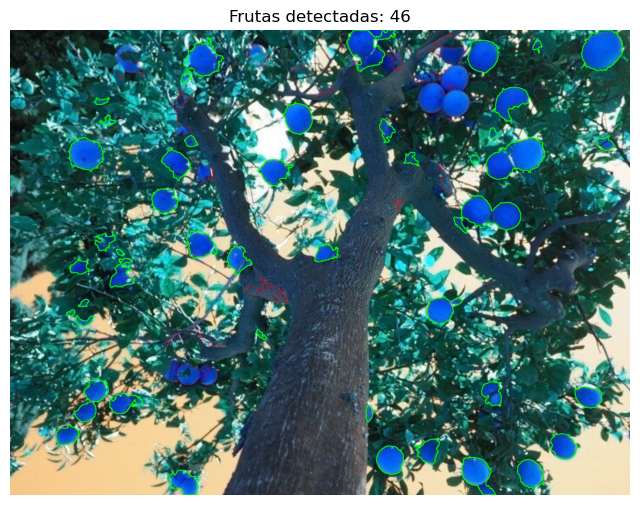

Frutas detectadas: 46


46

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label

# Función para mostrar imágenes
def show(img, title='', is_mask=False):
    plt.figure(figsize=(8, 8))
    if is_mask:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Superposición de la máscara sobre la imagen original
def show_overlay(image_rgb, mask, alpha=0.5):
    overlay = image_rgb.copy()
    mask_colored = np.zeros_like(image_rgb)
    mask_colored[mask > 0] = [255, 0, 0]  # Rojo
    blended = cv2.addWeighted(image_rgb, 1 - alpha, mask_colored, alpha, 0)

    plt.figure(figsize=(8, 8))
    plt.imshow(blended)
    plt.title("Máscara superpuesta sobre la imagen")
    plt.axis('off')
    plt.show()

# Segmentación para frutas por color (HSV)
def detect_by_color(image_rgb):
    hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

#-------------------------------------------------------------------
    # Para color rojo:
    # lower_red1 = np.array([0, 100, 100])
    # upper_red1 = np.array([10, 255, 255])

    # lower_red2 = np.array([160, 100, 100])
    # upper_red2 = np.array([179, 255, 255])

    # mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    # mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

    # full_mask = cv2.bitwise_or(mask1, mask2)
    # return full_mask
#-------------------------------------------------------------------
    # Para color naranja:
    # Naranja más claro
    lower_orange1 = np.array([8, 100, 100])
    upper_orange1 = np.array([15, 255, 255])

    # Naranja más oscuro o saturado
    lower_orange2 = np.array([16, 100, 100])
    upper_orange2 = np.array([25, 255, 255])

    mask1 = cv2.inRange(hsv, lower_orange1, upper_orange1)
    mask2 = cv2.inRange(hsv, lower_orange2, upper_orange2)

    full_mask = cv2.bitwise_or(mask1, mask2)
    return full_mask
#-------------------------------------------------------------------


# Conteo de frutas con filtros de área y forma
def count_and_draw_fruits(mask, image_rgb, min_size=300, min_circularity=0.2):
    output = image_rgb.copy()
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    count = 0

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area < min_size:
            continue

        perimeter = cv2.arcLength(cnt, True)
        if perimeter == 0:
            continue

        circularity = (4 * np.pi * area) / (perimeter ** 2)

        if circularity >= min_circularity:
            cv2.drawContours(output, [cnt], -1, (0, 255, 0), 2)  # Verde = válido
            count += 1
        else:
            cv2.drawContours(output, [cnt], -1, (0, 0, 255), 1)  # Rojo = descartado

    return count, output

# Función principal para procesar la imagen
def process_image_color_segmentation(path):
    image_bgr = cv2.imread(path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    show(image_bgr, "Imagen original")

    fruit_mask = detect_by_color(image_rgb)
    show(fruit_mask, "Máscara de frutas ", is_mask=True)
    show_overlay(image_rgb, fruit_mask)

    fruit_count, annotated_img = count_and_draw_fruits(fruit_mask, image_rgb)
    show(annotated_img, f"Frutas detectadas: {fruit_count}")

    print(f"Frutas detectadas: {fruit_count}")
    return fruit_count

# Ejecutar
process_image_color_segmentation("arbol.jpg")
